Iteración | x_n      | Error absoluto | Error relativo | Error cuadrático
-----------------------------------------------------------------------
        1 | 1.386294 | 3.862944e-01 | 2.786525e-01 | 1.492233e-01
        2 | 1.712929 | 3.266343e-01 | 1.906876e-01 | 1.066899e-01
        3 | 1.924499 | 2.115703e-01 | 1.099353e-01 | 4.476199e-02
        4 | 2.040960 | 1.164611e-01 | 5.706191e-02 | 1.356318e-02
        5 | 2.099715 | 5.875465e-02 | 2.798221e-02 | 3.452109e-03
        6 | 2.128096 | 2.838117e-02 | 1.333642e-02 | 8.054908e-04
        7 | 2.141522 | 1.342614e-02 | 6.269440e-03 | 1.802614e-04
        8 | 2.147811 | 6.289176e-03 | 2.928179e-03 | 3.955373e-05
        9 | 2.150744 | 2.932475e-03 | 1.363470e-03 | 8.599408e-06
       10 | 2.152108 | 1.364401e-03 | 6.339833e-04 | 1.861589e-06
       11 | 2.152742 | 6.341843e-04 | 2.945937e-04 | 4.021898e-07
       12 | 2.153037 | 2.946371e-04 | 1.368472e-04 | 8.681104e-08
       13 | 2.153174 | 1.368566e-04 | 6.356041e-05 | 1.872973e

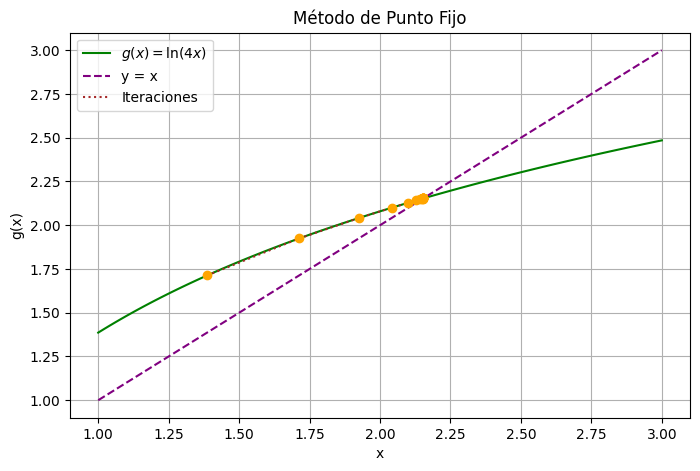

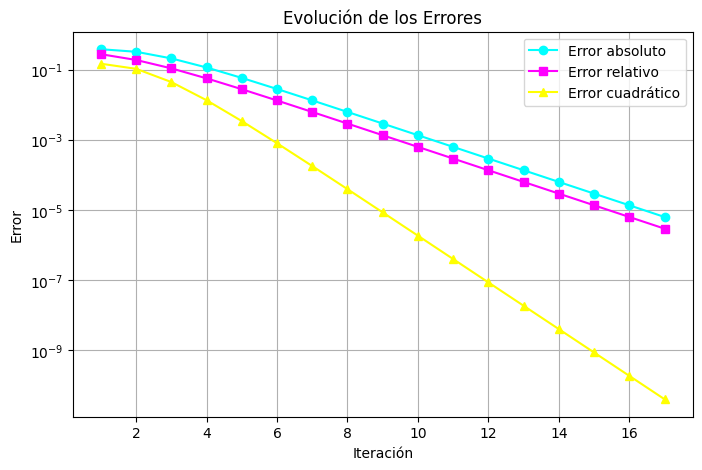

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función de iteración para el método de punto fijo
def g(x):
    return np.log(4*x)

# Derivada de g(x), utilizada para el criterio de convergencia
def g_prime(x):
    return 1/x

# Cálculo del error absoluto
def error_absoluto(x_new, x_old):
    return abs(x_new - x_old)

# Cálculo del error relativo
def error_relativo(x_new, x_old):
    return abs((x_new - x_old) / x_new)

# Cálculo del error cuadrático
def error_cuadratico(x_new, x_old):
    return (x_new - x_old)**2

# Implementación del método de punto fijo
def punto_fijo(x0, tol=1e-5, max_iter=100):
    iteraciones = []
    errores_abs = []
    errores_rel = []
    errores_cuad = []

    x_old = x0
    for i in range(max_iter):
        x_new = g(x_old)
        e_abs = error_absoluto(x_new, x_old)
        e_rel = error_relativo(x_new, x_old)
        e_cuad = error_cuadratico(x_new, x_old)

        iteraciones.append((i+1, x_new, e_abs, e_rel, e_cuad))
        errores_abs.append(e_abs)
        errores_rel.append(e_rel)
        errores_cuad.append(e_cuad)

        if e_abs < tol:
            break

        x_old = x_new

    return iteraciones, errores_abs, errores_rel, errores_cuad

# Definición del valor inicial
x0 = 1.0
iteraciones, errores_abs, errores_rel, errores_cuad = punto_fijo(x0)

# Imprimir tabla de iteraciones
print("Iteración | x_n      | Error absoluto | Error relativo | Error cuadrático")
print("-----------------------------------------------------------------------")
for it in iteraciones:
    print(f"{it[0]:9d} | {it[1]:.6f} | {it[2]:.6e} | {it[3]:.6e} | {it[4]:.6e}")

# Graficar la función y la línea de referencia
t_vals = np.linspace(1, 3, 100)
y_vals = g(t_vals)

plt.figure(figsize=(8, 5))
plt.plot(t_vals, y_vals, label=r"$g(x) = \ln(4x)$", color="green")
plt.plot(t_vals, t_vals, linestyle="dashed", color="purple", label="y = x")

# Graficar puntos de iteración
x_points = [it[1] for it in iteraciones]
y_points = [g(x) for x in x_points]
plt.scatter(x_points, y_points, color="orange", zorder=3)
plt.plot(x_points, y_points, linestyle="dotted", color="brown", label="Iteraciones")

plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.title("Método de Punto Fijo")
plt.savefig("punto_fijo_convergencia.png")
plt.show()

# Graficar evolución de los errores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errores_abs) + 1), errores_abs, marker="o", color="cyan", label="Error absoluto")
plt.plot(range(1, len(errores_rel) + 1), errores_rel, marker="s", color="magenta", label="Error relativo")
plt.plot(range(1, len(errores_cuad) + 1), errores_cuad, marker="^", color="yellow", label="Error cuadrático")

plt.xlabel("Iteración")
plt.ylabel("Error")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.title("Evolución de los Errores")
plt.savefig("errores_punto_fijo.png")
plt.show()
